## Before submitting
1. Before you turn your submission in, make sure everything runs as expected. `Kernel `$\rightarrow$` Restart and Run All Cells`

2. Make sure that no assertions fail or exceptions occur, otherwise points will be subtracted.
3. After you submit the notebook more tests will be run on your code. The fact that no assertions fail on your computer localy does not guarantee that you completed the exercise correctly.
4. Please submit only the edited original `*.ipynb` file. Do NOT rename the file.
5. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Edit only between `YOUR CODE HERE` and `END YOUR CODE`.
6. Make sure to use Python 3, not Python 2.
7. Read the notebook **thoroughly**.
8. Only work on the exercises using Jupyter Notebook. While editors such as PyCharm and VS Code support the `ipynb` format, they overwrite crucial metadata, which break the autograder system.

9. Do **NOT** under any circustances delete any cells that you didn't insert yourselves. If you accidentally delete a cell either undo the deletion using `Edit` $\rightarrow$ `Undo Delete Cells` or re-download the notebook file from ISIS and paste your existing code in there. 

Fill your group name and members below:

In [1]:
GROUPNAME = ""
COLLABORATORS = ""

In [2]:
import sys

assert sys.version_info >= (3, 6), "You need to be running at least Python version 3.6"

# Exercise Sheet 3: Sampling, Simulation

In this exercise sheet, we will simulate a Markov chain. In the first part, we will consider a pure Python based implementation where a single particle jumps from one position to another of the lattice, where all transitions to neighboring states have the same probability. Then, we will add probabilities for the transitions. Finally, the implementation will be parallelized to run many chains in parallel.

Keep in mind that you can get the documentation of modules and functions using the `help()` function.

In [3]:
# This cell is for grading. DO NOT remove it
import utils
from typing import Dict, List
# Use unittest asserts
import unittest

t = unittest.TestCase()


## Exercise 1: Random moves in a lattice (20 P)

In this exercise, we will simulate the propagation of particles in a graph composed of 8 states (denoted by letters A-H) and stored in the variable `S` defined in the cell below. The lattice is the following:

![](lattice.png)

The particle starts in state `A` and then jumps randomly from its current state to one of its neighbors, all with same probability. Note that it cannot stay at the current position. The dictionary `T` defined in the cell below encode such transition behavior.

In [4]:
# List of states
S = list("ABCDEFGH")

# Dictionary of transitions
T = {
    "A": "BE",
    "B": "AFC",
    "C": "BGD",
    "D": "CH",
    "E": "AF",
    "F": "EBG",
    "G": "FCH",
    "H": "GD",
}
print(f"States: {S}")
print(f"Transitions: {T}")
trans_states = ["A", "B", "C", "D", "E", "F", "G", "H"]
name = "Shreyank"
trans_states.index("B")


States: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
Transitions: {'A': 'BE', 'B': 'AFC', 'C': 'BGD', 'D': 'CH', 'E': 'AF', 'F': 'EBG', 'G': 'FCH', 'H': 'GD'}


1

In [5]:
a = []
a.append(3)
a

[3]

Using pure Python (i.e. no `numpy` functions), set the initial state to `A` and run it for 1999 iterations. Return the sequence of states visited by the particle as a list. Set the random seed of the module `random` to value `123` using the function `random.seed` before starting the simulation in order to produce deterministic results.

In [6]:
import random

In [7]:
def simulate(transitions: Dict[str, str]) -> List[str]:
    """
    Simulates a markov chain defined by the above transitions.
    This function always sets the random seed to `123`. All simulations start with 
    initial state `A`. It always simulates 2000 steps including the initial state.
    Args:
        transitions (Dict[str, str]): A dictionary with eight keys [A-H]. For each key a string is 
        mapped as its value. Each of those strings can only contain the letters [A-H] each
        letter can only appear once. `'A': 'BE'` means that from state `A` we can reach 
        the states `B` and `E` and no other state. 
    Returns:
        List[str]: A list of states (a string containing one of the letters [A-H]) 
        that were visited during the simulation.
    """
    # YOUR CODE HERE
    
    random.seed(123)
    
    initial_state = 'A'
    
    visited_states = ['A']
    
    for i in range(0, 1999):
        #value = random.choice(transitions[initial_state])
        visited_states.append(random.choice(transitions[initial_state]))
        initial_state = random.choice(transitions[initial_state])
        
    return visited_states
    
    # YOUR CODE HERE
    

In [8]:
# Tests
X = simulate(T)

# Print the first 10 states
print(f"First 10 visited states --> {X[:10]}")
t.assertIsInstance(X, List, "The state sequence must be a list")
t.assertEqual(len(X), 2000)
t.assertIsInstance(X[0], str, "The state sequence must only contain strings")
t.assertEqual(X[0], "A", "The state sequence must start with A")
t.assertTrue(all(x in S for x in X), "Your state sequence containes an invalid state")
t.assertEqual(set(S), set(X), "Your list should contain each state at least once")


First 10 visited states --> ['A', 'B', 'A', 'B', 'A', 'G', 'C', 'B', 'A', 'G']


In [9]:
# This cell is for grading. DO NOT remove it

Implement a function that returns a list of the relative frequencies of each state.

In [10]:
def compute_histogram(
    valid_states: List[str], state_sequence: List[str]
) -> List[float]:
    """
    Returns a list of percentages relating as to how many times each state 
    has been visited according to the `state_sequence` list
    
    Args:
        valid_states (List[str]): A list of all valid states
        state_sequence (List[str]): A sequence of states for which we
            want to calculate the frequencies
    Returns:
        List[float]: A list of length 8. Contains the percentage `[0-1]` of occurances of each state
        in the `state_sequence`. 
    """
    # YOUR CODE HERE
    
    frequency_list = []
    
    for state in valid_states:
        i = state_sequence.count(state)
        frequency_list.append(i/len(state_sequence))
        
    return frequency_list
   
    # YOUR CODE HERE
    

In [11]:
h = compute_histogram(S, X)
print(f"frequencies -> {h}")
t.assertIsInstance(h, list)
# Check if the histogram is a valid probability distribution
print(f"sum -> {sum(h)}")
t.assertAlmostEqual(sum(h), 1.0)

t.assertTrue(all(f < 0.2 for f in h))

frequencies -> [0.0955, 0.1445, 0.1475, 0.1015, 0.0985, 0.1455, 0.1555, 0.1115]
sum -> 1.0


In [12]:
"""This cell is for grading.DO NOT remove it"""

'This cell is for grading.DO NOT remove it'

Using the above `compute_histogram` function, produce a bar plot using `matplotlib` (`matplotlib.pyplot.bar`) showing the fraction of the time the particle is found in a given state, averaged over the whole simulation. Do **not** call plt.show in the function (it is automatically called because of `%matplotlib inline`

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def plot_histogram(valid_states: List[str], frequencies: List[float]) -> None:
    """
    Plots a bar graph of a provided histogram. 
    
    Args:
        valid_states (List[str]): The list of states 
        frequencies (List[float]): The frequency of each state
    """
    # YOUR CODE HERE
   
    plt.bar(valid_states, frequencies)
    
    # YOUR CODE HERE
    

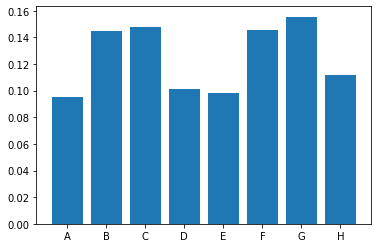

In [15]:
# Plot the histogram of the above defined sequence X
h = compute_histogram(S, X)
plot_histogram(S, h)

## Exercise 2: Adding a special state (10 P)

Suppose now that the rule (defined by the transition dictionary) is modified such that everytime the particle is in state `F`, it always moves to `E` in the next step.

* Modify the code to handle this special case, and create a bar plot for the new states distribution. Make sure to not modify the original transition dictionary. To achieve this, you can have a look at the `copy` module, but every working solution is accepted.

In [16]:
def modify_transitions(transitions: Dict[str, str]) -> Dict[str, str]:
    """
    Creates a modified transition dictionary without modifing the provided one.
    
    This function creates a new transition dictionary such that from state `F` the only 
    possible following state is `E`.
    
    Args:
        transitions (dict): A dictionary that describes the possible transitions from each state
    Returns:
        dict: A modified transition dict where from state `F` only state `E` can follow
     """
    # YOUR CODE HERE
    
    Transitions = transitions.copy()
    
    Transitions['F'] = 'E'
    
    return Transitions
    

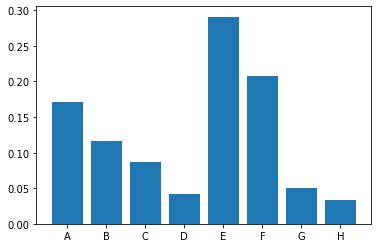

In [17]:
new_T = modify_transitions(T)
new_X = simulate(new_T)
h = compute_histogram(S, new_X)
plot_histogram(S, h)

In [18]:
# Tests
new_T = modify_transitions(T)
print(f"new_T['F'] = {new_T['F']}")
print(f"T['F'] = {T['F']}")
t.assertIsInstance(new_T, Dict)
t.assertIsNot(T, new_T, "T and new_T should not be the same instance")

new_T['F'] = E
T['F'] = EBG


## Exercise 3: Exact solution to the previous exercise (15 P)

For simple Markov chains, a number of statistics can be obtained analytically from the structure of the transition model, in particular, by analysis of the transition matrix.

* Compute the transition matrices associated to the models of exercise 1 and 2 (make sure that each row in these matrices sums to 1).
* Give the transition matrices as argument to the function `utils.getstationary(P)` and return their result.

This last function computes in closed form the stationary distribution associated to a given transition matrix `P` (i.e. the one we would get if running the simulation with such transition matrix for infinitely many time steps and looking at state frequencies).

In [19]:
import numpy as np

In [20]:
def to_matrix(transition: Dict[str, str]) -> np.ndarray:
    """
    Converts a transition dictionary into a transition matrix. The first row 
    represents the propability of moving from the first state to every state.
    
    If the state dict is irreflexive (we cannot go from one state to the same 
    state) the sum of the diagonal is 0. 
    
    The sum of each row should be 1.
    
    All the elements in the matrix are values in [0-1].
    
    Args:
        transition (Dict[str, str]): A dictionary describing the possible 
            transitions from each state.
        
    Returns:
        np.ndarray: The transition matrix (ndim=2) that represents the same 
        (uniform) transitions as the transition dict
    """
    
    t_matrix = []
    
    state = ['A','B','C','D','E','F','G','H']
    
    row = [0,0,0,0,0,0,0,0]
    
    for states in transition:
        d = transition[states]
        probability = 1/len(d)
        
        if(len(d) == 3):
            row_c = row.copy()
            for s in d:
              index_s = state.index(s)
              row_c[index_s] = probability
            t_matrix.append(row_c)
         
        else:
            row_c = row.copy()
            for s in d:
               index_s = state.index(s)
               row_c[index_s] = probability
            t_matrix.append(row_c)
    
    return np.array(t_matrix)
   
    # YOUR CODE HERE
    

In [21]:
matrix_T = to_matrix(T)
print(matrix_T.round(2))

t.assertIsInstance(matrix_T, np.ndarray)
np.testing.assert_allclose(np.sum(matrix_T, axis=1), 1.0)


[[0.   0.5  0.   0.   0.5  0.   0.   0.  ]
 [0.33 0.   0.33 0.   0.   0.33 0.   0.  ]
 [0.   0.33 0.   0.33 0.   0.   0.33 0.  ]
 [0.   0.   0.5  0.   0.   0.   0.   0.5 ]
 [0.5  0.   0.   0.   0.   0.5  0.   0.  ]
 [0.   0.33 0.   0.   0.33 0.   0.33 0.  ]
 [0.   0.   0.33 0.   0.   0.33 0.   0.33]
 [0.   0.   0.   0.5  0.   0.   0.5  0.  ]]


In [22]:
# This cell is for grading. DO NOT remove it

## Exercise 4: Adding non-uniform transition probabilities (25 P)

We consider the original lattice defined by the variable `T`. We set transition probabilities for each state to be such that:

1. The probability of moving vertically is the same as the probability of moving horizontally for states that have only two connections.
2. For states with 3 connections the probability of moving vertically is 0.5 while the probability of moving left is always twice the probability of moving right.

**Hints**: You can notice that for each state, the transitions towards other states are always listed from left to right in the dictionary `T`. Also note that characters A-H can be mapped to integer values using the Python function `ord()`, thus, giving a direct relation between state names and indices of the transition matrix.

**a)** Build a function that converts the string state into a numeric index

In [23]:
def state_string_to_index(state: str) -> int:
    """
    Converts the state string into a numerical index, where:
    'A' -> 0
    'B' -> 1
    ...
    'H' -> 7
    
    Args:
        state (str): A state string in [A-H] with len(sta te) == 1
    Returns:
        int: The index of the state in [0-7]
    """
    # YOUR CODE HERE
    
    return((ord(state)) - 65)
    
    # YOUR CODE HERE
    

In [24]:
# Test state_string_to_index
A_idx = state_string_to_index("A")
t.assertNotIsInstance(A_idx, float)
t.assertEqual(A_idx, 0)

In [25]:
# This cell is for grading. DO NOT remove it

**b**) Now implement the `build_transition_matrix` according to the rules defined above.

In [26]:
def build_transition_matrix(transition: Dict[str, str]):
    """
    Builds a transition matrix from a transition dictionary, similarly to
    `to_matrix` function. However, this function does not create a uniform 
    distribution among the following states. 
    
    If the the next valid states are two then the distribution is uniform.
    
    If the the next valid states are three, then moving vertically should have a 
    50% chance and moving left twice as much as moving right. 
    
    Like in the `to_matrix` function the sum of each row should be 1.
    
    Args:
        transition (Dict[str,str]) A dictionary describing the possible 
            transitions from each state.
    Returns:
        np.ndarray: A transition matrix
    """
    # YOUR CODE HERE
    
    transition_matrix = []
    
    row_ = [0,0,0,0,0,0,0,0]
    
    states = ['A','B','C','D','E','F','G','H']
    
    for state in transition:
        if(len(transition[state]) == 2):
            probability = 0.5
            row = row_.copy()
            x = transition[state]
            for s in x:
                index_s = states.index(s)
                row[index_s] = probability
            transition_matrix.append(row)
            
        else:
            
            row = row_.copy()
            x = transition[state]
            probability = 0.5/3
            for s in x:
                if(x.index(s) == 1):
                    index_s = states.index(s)
                    row[index_s] = 0.5
                elif(x.index(s) == 0):
                    index_s = states.index(s)
                    row[index_s] = float(2*probability)
                
                else:
                    index_s = states.index(s)
                    row[index_s] = float(probability)
            transition_matrix.append(row)
    
    return np.array(transition_matrix)                
    
    # YOUR CODE HERE
    

In [27]:
# Test build_transition_matrix
P = build_transition_matrix(T)
print(P.round(3))

t.assertIsInstance(P, np.ndarray)
np.testing.assert_allclose(P.sum(axis=1), 1.0)
np.testing.assert_allclose(P[1, 2], 0.16666667)

[[0.    0.5   0.    0.    0.5   0.    0.    0.   ]
 [0.333 0.    0.167 0.    0.    0.5   0.    0.   ]
 [0.    0.333 0.    0.167 0.    0.    0.5   0.   ]
 [0.    0.    0.5   0.    0.    0.    0.    0.5  ]
 [0.5   0.    0.    0.    0.    0.5   0.    0.   ]
 [0.    0.5   0.    0.    0.333 0.    0.167 0.   ]
 [0.    0.    0.5   0.    0.    0.333 0.    0.167]
 [0.    0.    0.    0.5   0.    0.    0.5   0.   ]]


In [28]:
# This cell is for grading. DO NOT remove it

## Exercise 5: Simulation for multiple particles (30 P)

We let 1000 particles evolve simultaneously in the system described in Exercise 4. The initial state of these particles is pseudo-random and given by the function `utils.getinitialstate()`.

* Using the function `utils.mcstep()` that was introduced during the lecture, simulate this system for 500 time steps.
* Estimate the stationary distribution by looking at the distribution of these particles in state space after 500 time steps.

For reproducibility, give seed values to the function utils.mcstep corresponding to the current time step of the simulation (i.e. from 0 to 499).

In [ ]:
def simulate_1000(transition):
    """
    Simulates 1000 particles for 500 time steps, in order to approximate
    the stationary distribution
    
    Args:
        transition: A transition dict, that will be converted into a transition matrix using the 
        `build_transition_matrix` function
    Returns:
        np.ndarray: The estimated stationary distribution vector (ndim=1)
    
    """
    # YOUR CODE HERE
      
    
    
    # YOUR CODE HERE
    

In [ ]:
# For reference this is the actual stationary distribution
print(utils.getstationary(build_transition_matrix(T)).round(4))

In [ ]:
# Tests
stationary_distribution = simulate_1000(T)
print(stationary_distribution)
t.assertIsInstance(stationary_distribution, np.ndarray)
t.assertEqual(stationary_distribution.shape, (8,))
np.testing.assert_allclose(np.sum(stationary_distribution), 1)
